In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from my_modules import compute

In [3]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

In [4]:
# color map
ce_cmap = sns.diverging_palette(20, 220, as_cmap=True)
interaction_cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

In [5]:
storage = os.environ['MICOM_EXP'] + 'setA_coculture_b12_c96/' # on Peregrine
print(storage)

meta_species = pd.read_csv(storage + "selected_species_setA.tsv", sep="\t")
meta_species

/data/s4278836/First_project/experiments/setA_coculture_b12_c96/


Ecotype Ecotype_ID Species_ID                             Species_name
0       I        I_a    setA_15                Helicobacter_pylori_26695
1       I        I_b    setA_21           Pseudomonas_nitroreducens_HBP1
2      II       II_a    setA_11               Eggerthella_lenta_DSM_2243
3      II       II_b    setA_24         Ruminococcus_lactaris_ATCC_29176
4     III      III_a     setA_6         Brevibacillus_brevis_NBRC_100599
5     III      III_b    setA_13  Escherichia_coli_str_K_12_substr_MG1655
6      IV       IV_a    setA_19             Odoribacter_laneus_YIT_12061
7      IV       IV_b    setA_20           Peptoniphilus_timonensis_JC401
8       V        V_a    setA_16              Lactobacillus_gastricus_PS3

In [6]:
data_dir = storage + 'features/'

media=['EU_avg', 'high_fat']

# for computing interaction coefficients
mono_data_dir = os.environ['MICOM_EXP'] + 'setA_mono_b12_c144/features/' # on Peregrine

In [7]:
# for annotating species with their "degree of plasticity" in mono-culture
mono_plasticity_file = "../setA_mono_b12_c144/features/log_fold_change.plasticity.tsv"

mono_plasticity = pd.read_csv(mono_plasticity_file, sep='\t', usecols=['species_ID', 'media', 'log_fold_change', 'culture_type'])

# Standard deviation in density @ equilibrium

## Continuous culture

In [8]:
culture_type = 'continuous'

# for competitive exclusion assessment
min_density=1.0e-2

In [9]:
std_without_ce, meta = compute.stack_co_media(data_dir, culture_type, media, plastic=True, 
                                              rm_compet_excl=True, ce_feature='od', min_survived=min_density, 
                                              method='std')
vmin = 0.0
vmax = np.nanmax(std_without_ce)
print(vmax)

std_without_ce

22.141154998996775


/home/s4278836/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


array([[[           nan, 4.67292898e+00, 2.61819221e+00, 3.37365266e+00,
         1.48420932e+00],
        [2.21411550e+01,            nan, 2.49198716e-04, 1.10000000e-04,
                    nan],
        [3.94200000e-02, 3.00000000e-05,            nan,            nan,
                    nan],
        [0.00000000e+00, 0.00000000e+00,            nan,            nan,
                    nan],
        [1.42634713e+00,            nan,            nan,            nan,
                    nan]],

       [[           nan, 1.69027566e+00, 5.24617956e-04, 7.44580419e-05,
         2.11839562e-04],
        [1.29646894e+01,            nan, 1.61141884e+01, 4.00000000e-04,
                    nan],
        [2.22044605e-16, 4.89897949e-06,            nan, 9.79795897e-07,
                    nan],
        [3.44818793e-04, 1.28452326e-04, 2.62488095e-04,            nan,
         6.85857128e-04],
        [9.80051019e-06,            nan,            nan, 3.78231411e-04,
                    nan]]])

Text(0.5, 1.05, 'EU_avg')

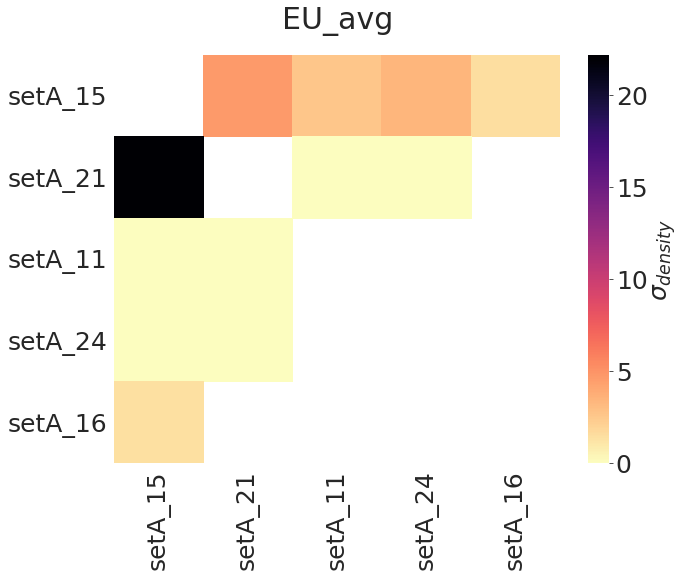

In [10]:
# EU_avg
i=0

fig, ax = plt.subplots(figsize=(10,7.5))

sns.heatmap(std_without_ce[i, :, :], xticklabels=meta['species_ID'], yticklabels=meta['species_ID'], 
            vmin=vmin, vmax=vmax, cmap='magma_r', cbar_kws={'label': r'$\sigma_{density}$'}, ax=ax)
ax.set_title(media[i], y=1.05)

Text(0.5, 1.05, 'high_fat')

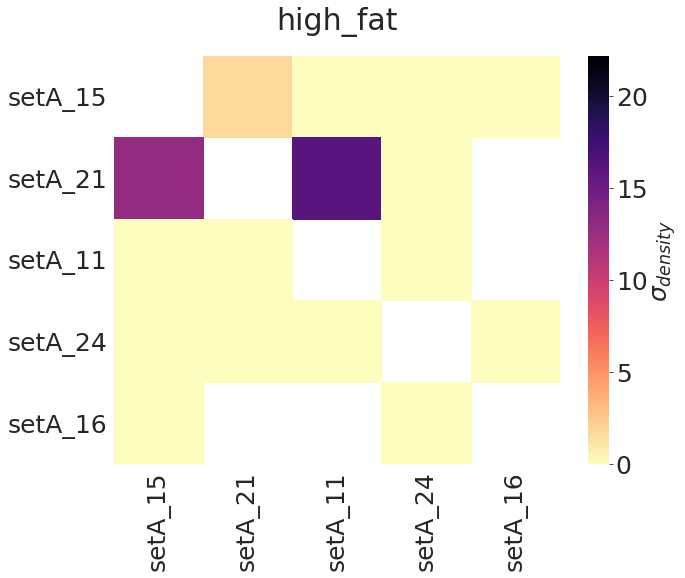

In [11]:
# high_fat
i=1

fig, ax = plt.subplots(figsize=(10,7.5))

sns.heatmap(std_without_ce[i, :, :], xticklabels=meta['species_ID'], yticklabels=meta['species_ID'], 
            vmin=vmin, vmax=vmax, cmap='magma_r', cbar_kws={'label': r'$\sigma_{density}$'}, ax=ax)
ax.set_title(media[i], y=1.05)

In [12]:
std_with_ce, meta = compute.stack_co_media(data_dir, culture_type, media, plastic=True, 
                                           rm_compet_excl=False,
                                           method='std')
vmin = 0.0
vmax = np.nanmax(std_with_ce)
print(vmax)

std_with_ce

22.141154998996775


array([[[           nan, 4.67292898e+00, 2.61819221e+00, 3.37365266e+00,
         1.34684947e+00],
        [2.21411550e+01,            nan, 2.49198716e-04, 1.10000000e-04,
         2.56124969e-04],
        [3.94200000e-02, 3.00000000e-05,            nan, 3.00000000e-05,
         4.00000000e-05],
        [0.00000000e+00, 0.00000000e+00, 1.99064349e-05,            nan,
         1.75515498e-08],
        [1.30018967e+00, 1.26603357e-06, 1.54319279e-06, 3.00000000e-05,
                    nan]],

       [[           nan, 1.69027566e+00, 5.24617956e-04, 7.44580419e-05,
         2.11839562e-04],
        [1.29646894e+01,            nan, 1.61141884e+01, 4.00000000e-04,
         3.00000000e-04],
        [2.22044605e-16, 4.89897949e-06,            nan, 9.79795897e-07,
         2.22044605e-16],
        [3.44818793e-04, 1.28452326e-04, 2.62488095e-04,            nan,
         6.85857128e-04],
        [9.80051019e-06, 2.02001774e-07, 1.63679229e-10, 3.78231411e-04,
                    nan]]])

Text(0.5, 1.05, 'EU_avg')

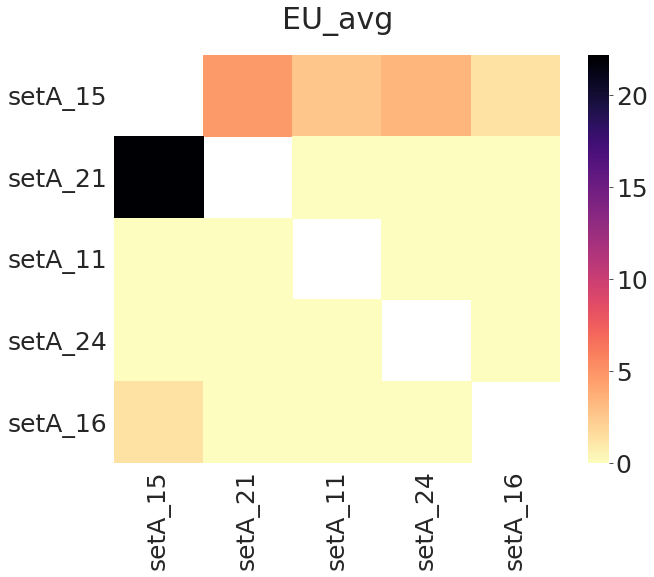

In [13]:
# EU_avg
i=0

fig, ax = plt.subplots(figsize=(10,7.5))

sns.heatmap(std_with_ce[i, :, :], xticklabels=meta['species_ID'], yticklabels=meta['species_ID'], 
            vmin=vmin, vmax=vmax, cmap='magma_r', ax=ax)
ax.set_title(media[i], y=1.05)

Text(0.5, 1.05, 'high_fat')

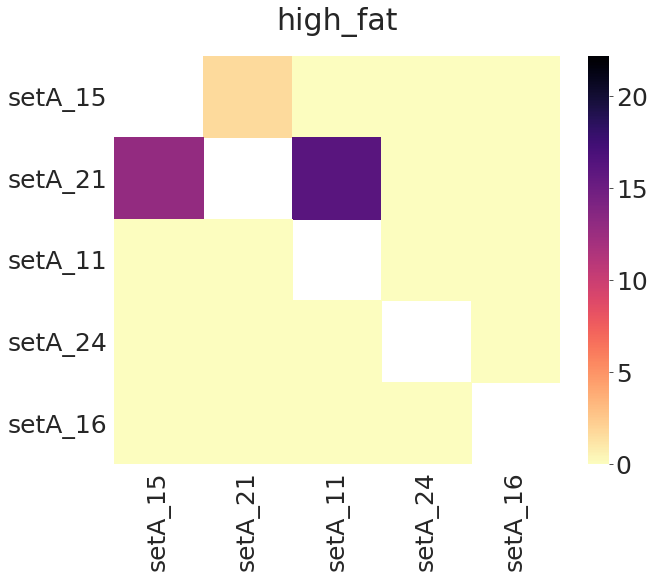

In [14]:
# high_fat
i=1

fig, ax = plt.subplots(figsize=(10,7.5))

sns.heatmap(std_with_ce[i, :, :], xticklabels=meta['species_ID'], yticklabels=meta['species_ID'], 
            vmin=vmin, vmax=vmax, cmap='magma_r', ax=ax)
ax.set_title(media[i], y=1.05)